In [1]:
import sys

print(sys.executable)

/home/rnslucas/anaconda3/bin/python


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from PIL import Image

# Global Options
USE_GREYSCALE = False
IMAGESIZE = 128


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

**Introduction**

This is an attempt to put the techniques I've learnt from Andrew Ng's Deep Learning course from Coursera.
For the intial attempt I'll compare a simple logistic regression against a conventional Neural Net. 
So this might take some time to write.


In [2]:
# Explore the files in the dataset
# Uncomment this to see the files listing

import os
from os import walk
print(os.listdir("../input"))
for (dirpath, dirnames, filenames) in walk("../input"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    print("File name: ", filenames)


['dogs-vs-cats.zip', 'dogs_vs_cats', 'testing_data_set_x_flatten.npy', 'testing_labels.npy', 'training_data_set_x_flatten.npy', 'training_labels.npy']
Directory path:  ../input
Folder name:  ['dogs_vs_cats']
File name:  ['dogs-vs-cats.zip', 'testing_data_set_x_flatten.npy', 'testing_labels.npy', 'training_data_set_x_flatten.npy', 'training_labels.npy']
Directory path:  ../input/dogs_vs_cats
Folder name:  ['test', 'train']
File name:  []
Directory path:  ../input/dogs_vs_cats/test
Folder name:  ['cats', 'dogs']
File name:  []
Directory path:  ../input/dogs_vs_cats/test/cats
Folder name:  []
File name:  ['cat.10.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10007.jpg', 'cat.10017.jpg', 'cat.10021.jpg', 'cat.10026.jpg', 'cat.10030.jpg', 'cat.10033.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10046.jpg', 'cat.10048.jpg', 'cat.10052.jpg', 'cat.10057.jpg', 'cat.10064.jpg', 'cat.10074.jpg', 'cat.10086.jpg', 'cat.10091.jpg', 'cat.10105.jpg', 'cat.10109.jpg', 'cat.10110.jpg', 'cat.10114.jpg', 'c

In [3]:
def createImageLists(directory, label = None):
    """
    Creates a list of filenames from the supplied directory and a list of labels; 
    This can even be an internal directory of a zip file as Kaggle
    will expose these automatically, so that they can be treated as 
    if they had been extracted.
    (https://www.kaggle.com/data/62571)
    
    Input - directory containing the files
            [optional - label - values 0|1] where 0 = Cat, 1 = Dog
    Returns - list of images, list of labels
    """
    files = []
    labels = []
    
    for file_name in os.listdir(directory):
        # We'd better check that it is a file before adding 
        if os.path.isfile(os.path.join(directory, file_name)):
            #print(file_name)
            #files[directory + "/" + file_name] = label
            files.append(os.path.join(directory, file_name))
            labels.append(label)
        
    return files, labels

10000
File name: ../input/dogs_vs_cats/train/cats/cat.10003.jpg
Training label value: 0


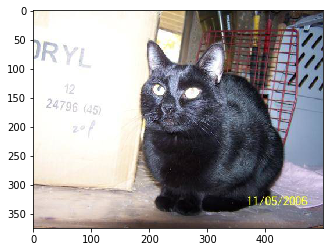

In [12]:
# Test createImageDictionary
training_cats_files, training_cats_labels = createImageLists("../input/dogs_vs_cats/train/cats", 0)
print(len(training_cats_files))
print("File name: {}".format(training_cats_files[5]))
displayImage(training_cats_files[5])
print("Training label value: {}".format(training_cats_labels[5]))


In [4]:
def displayImage(image_file):
    """ 
    Will display the supplied image 
    (with thanks to Igor Barros Barbosa https://www.kaggle.com/igorbarrosbarbosa/show-one-image-of-the-dataset.
    It's amazing how much time so few lines of code can suck up time)
    """
    img_array = np.array(Image.open(image_file))
    plt.imshow(img_array)


In [5]:
def resizeImage(image_file, size = 128):
    """
    Resizes the image to a square size x size
    Input:  path and and to image file
            size - number of pixels (optional)
    Return: a PIL image
    """
    #print("Resizing image: {}".format(image_file))
    return Image.open(image_file).resize((size, size), resample = Image.NEAREST)

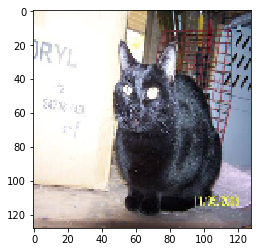

In [14]:
# testResizeImage():
image_array = resizeImage(training_cats_files[5])
#print("Image shape: {}".format(image_array.shape))
plt.imshow(image_array)

In [6]:
def convertToGreyScale(image):
    """
    Input: a PIL Image
    Return: a PIL Imange
    """
    return image.convert(mode = 'L' )
    

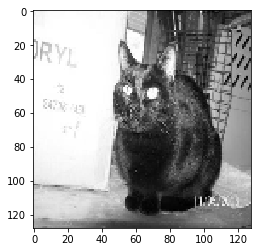

In [16]:
# testConvertToGreyScale
image_array = resizeImage(training_cats_files[5])
image_array = convertToGreyScale(image_array)
plt.imshow(image_array)

In [ ]:
def vectoriseImage(image_array):
    '''
    Convert the image for a height * width * 3 matrix to a vector 
    Input: a PIL Image
    Return: a Vector
    '''
    pass


In [7]:
def processImages(image_list, imagesize = 128, grey_scale = False):
    """
    Imports each image in the supplied directory into a image.
    While doing that, each image is converted to grey scale, 
    resized to 128 by 128 and then flattened into a vector.

    Interestingly, the images are not all the same size. This could 
    cause complications so we may need work on how to bring them to the same size
    
    Input: list of image files
    Return: np.ndarray
    """
    images = []
    for image in image_list:
        image_array = resizeImage(image, imagesize)
        if grey_scale: 
            image_array = convertToGreyScale(image_array)
        images.append(np.array(image_array))
    return np.array(images, dtype='float32')

In [8]:
#testProcessImages
array = processImages(training_cats_files)
print("Shape: " + str(array.shape))
array = None


NameError: name 'training_cats_files' is not defined

In [11]:
# Main Data Preparaion
image_size = IMAGESIZE # pixel size height and width

training_cats_files, training_cats_labels = createImageLists("../input/dogs_vs_cats/train/cats", 0)
training_dogs_files, training_dogs_labels = createImageLists("../input/dogs_vs_cats/train/dogs", 1)
testing_cats_files, testing_cats_labels = createImageLists("../input/dogs_vs_cats/test/cats", 0)
testing_dogs_files, testing_dogs_labels = createImageLists("../input/dogs_vs_cats/test/dogs", 1)

training_data_files = training_cats_files + training_dogs_files
testing_data_files = testing_cats_files + testing_dogs_files
training_labels = training_cats_labels + training_dogs_labels
testing_labels = testing_cats_labels + testing_dogs_labels

assert len(training_data_files) == 20000
print("Total number of training examples = {}".format(len(training_data_files)))
print("Total number of testing examples = {}".format(len(testing_data_files)))

# Convert the training label lists into np.array n x 1 shape (avoiding so called 'rank 1' arrays)
training_labels = np.array(training_labels, dtype='float32', ndmin = 2)
print("Shape of training_labels " + str(training_labels.shape)) 
testing_labels = np.array(testing_labels[:], dtype='float32', ndmin = 2)
print("Shape of testing_labels " + str(training_labels.shape)) 

# Process the training and test and convert to NP arrays
training_data_set_x = processImages(training_data_files)
testing_data_set_x = processImages(testing_data_files)

print("Shape of training_data_set " + str(training_data_set_x.shape))
print("Shape of testing_data_set " + str(testing_data_set_x.shape))

# Transform the training data_list into a matrix of vectors ([image height * width * depth], count of images)
training_data_set_x_flatten = training_data_set_x.reshape(training_data_set_x.shape[0], -1).T
testing_data_set_x_flatten = testing_data_set_x.reshape(testing_data_set_x.shape[0], -1).T

# Save memory by nulling the training_data_set_x and testing_data_set_x as we've finished with them
training_data_set_x = None
testing_data_set_x = None

# Standardise the data by dividing the pixel values by 256 eg: train_set_x = train_set_x_flatten/255
# (ok - its not the 'true' standardisation where we take the subtract the mean from each example and divide by std.dev, 
# but if Andy Ng says / 255 is good enough for images, who am I to argue? )
training_data_set_x_flatten = training_data_set_x_flatten / 255
testing_data_set_x_flatten = testing_data_set_x_flatten / 255

print("Shape of training_data_set_x_flatten: " + str(training_data_set_x_flatten.shape))
print("Shape of testing_data_set_x_flatten: " + str(testing_data_set_x_flatten.shape))


Total number of training examples = 20000
Total number of testing examples = 5000
Shape of training_labels (1, 20000)
Shape of testing_labels (1, 20000)
Shape of training_data_set (20000, 128, 128, 3)
Shape of testing_data_set (5000, 128, 128, 3)
Shape of training_data_set_x_flatten: (49152, 20000)
Shape of testing_data_set_x_flatten: (49152, 5000)


In [12]:
# Save the arrays so that they can be used again without having to process the data
np.save("../input/training_data_set_x_flatten.npy", training_data_set_x_flatten)
np.save("../input/testing_data_set_x_flatten.npy", testing_data_set_x_flatten)
np.save("../input/training_labels.npy", training_labels)
np.save("../input/testing_labels.npy", testing_labels)


In [13]:
# Load the arrays from disk to save time after a previous run
training_data_set_x_flatten = np.load("../input/training_data_set_x_flatten.npy")
testing_data_set_x_flatten = np.load("../input/testing_data_set_x_flatten.npy")
training_labels = np.load("../input/training_labels.npy")
testing_labels = np.load("../input/testing_labels.npy")

In [15]:
# Memory profiling - what is using our memory?
%load_ext memory_profiler
%memit


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 5077.71 MiB, increment: 0.74 MiB


In [22]:
# Lets start the Simple Logistic Regression - ie no deep learning
# Then we'll try the deep learning techniques

# Firstly some useful functions
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size
    
    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

def initialize_with_zeros(dim):
    """
    Creates a vector of zeros of shape (dimension, 1) for w and initialises b to 0
    
    Arguments:
    dim -- size of th w vector eg. the number of parameters
    
    returns the weight (w) and the bias (b):
    w -- initialised vector of shape (dim, 1)
    """
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    
    return w, b

def propagate(w, b, X, Y):
    """ 
    Implements the cost function and gradient
    
    Arguments:
    w -- weights, a numpy array of size(IMAGESIZE * IMAGESIZE * 3, 1)
    b -- bias, a scalar
    X -- data of size(IMAGESIZE * IMAGESIZE * 3, number of examples)
    Y -- label vector containing 0 if a Cat or 1 if a dog, of size (1, number_examples)
    
    Returns:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, the same shape as w
    db -- gradient of the loss with respect to b, the same shape as b
    
    """
    # number of training examples
    m = X.shape[1]
    
    # Forward propagation (from X to COST)
    A = sigmoid(np.dot(w.T, X) + b)  # computes the activation
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 -A))) # computers the cost
    
    # Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    # Squeeze the cost into a scalar 
    cost = np.squeeze(cost)
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost


In [23]:
# Test sigmoid and propagate
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

sigmoid([0, 2]) = [0.5        0.88079708]
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
